[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import necessary libraries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [5]:
pm10_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [6]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-6-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [7]:
#merged_data.dtypes

In [8]:
pollution_data = merged_data[['pm10','neighborhood']]

In [9]:
pollution_data.shape[0]

118495

In [10]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [11]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [12]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [13]:
pollution_data['pm10'].min()

0.0

In [14]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [15]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [16]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [17]:
# Display first 5 rows and print number of rows and columns
joined_table.show(5)
print("Number of rows:", joined_table.num_rows)
print("Number of columns:", joined_table.num_columns)


pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


Number of rows: 118495
Number of columns: 2


In [18]:
# Identifying rows with missing values. It is difficult to do so using only
# numpy tables, so I had to temporarily convert the table to a dataframe
df = joined_table.to_df()
print(df.isnull().sum())


pm10            0
neighborhood    0
dtype: int64


In [19]:
# There are no rows with empty values, but here is how to remove such rows
df_cleaned = df.dropna()
joined_table_cleaned = Table().from_df(df_cleaned)

# Alternatively, I can fill missing values with the mean of PM10 as a default value
# df_filled = df.fillna({'pm10': df['pm10'].mean()})
# joined_table_filled = Table().from_df(df_filled)


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [20]:
# Computing summary statistics
pm10_table = Table().from_df(pm10_data)

# Extract the columns
temperature = pm10_table.column('temperature')
humidity = pm10_table.column('humidity')
pm25 = pm10_table.column('pm25')

# Create a summary statistics table
summary_stats = Table().with_columns(
    "Attribute", ["Temperature", "Humidity", "PM25"],
    "Mean", [np.mean(temperature), np.mean(humidity), np.mean(pm25)],
    "Median", [np.median(temperature), np.median(humidity), np.median(pm25)],
    "Min", [min(temperature), min(humidity), min(pm25)],
    "Max", [max(temperature), max(humidity), max(pm25)]
)

# Display the summary table
summary_stats.show()




Attribute,Mean,Median,Min,Max
Temperature,8.24488,7.2,-7.9,10471
Humidity,50.1592,46.3,0,104.2
PM25,7.36112,3.01,0,3267.02


In [21]:
# Grouping the data using group()
merged_table = Table().from_df(merged_data)
borough_avg_pm25_group = merged_table.select('borough', 'pm25').group('borough', np.mean)

# Rename for clarity
borough_avg_pm25_group = borough_avg_pm25_group.relabel('pm25 mean', 'Average PM25')

# Display the result
borough_avg_pm25_group.show(5)


borough,Average PM25
Bronx,7.795
Brooklyn,1.99695
Manhattan,2.37332
Queens,2.07253


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

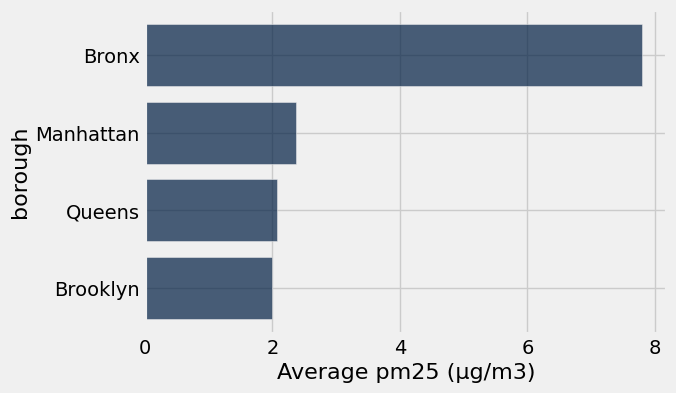

In [22]:
# pm25 bar chart in descending order for better readability
borough_avg_pm25_group.sort('Average PM25', descending=True).relabel('Average PM25','Average pm25 (μg/m3)').barh('borough','Average pm25 (μg/m3)')

In [23]:
# Let's check the values to be plotted first

temp_pm25_data = merged_table.select('temperature','pm25')
temp_pm25_data.sort('temperature',descending=True)

temperature,pm25
10471,8.24
39.9,0.1
39.8,1.32
39.6,0.2
38.9,0.05
38.6,0
34.2,8.99
34.2,3.63
34.2,2.46
34.2,3.82


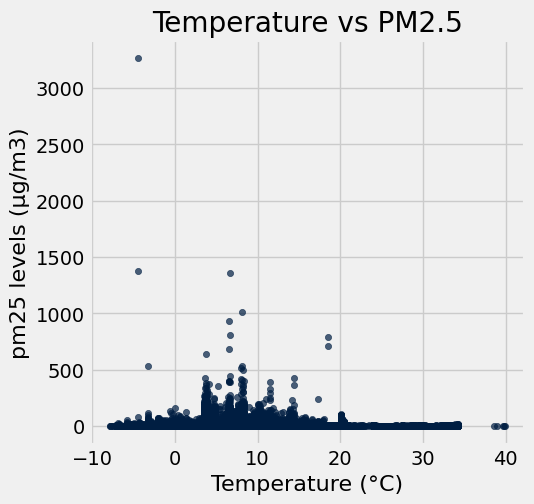

In [24]:
# There is a temperature outlier (10471 degrees Celsius) which could be an error
# Therefore it must be excluded from the scatter plot
# There could still be other outliers but not as bad as the aforementioned one

temp_pm25_data = merged_table.select('temperature','pm25').where('temperature', are.below(10000))
temp_pm25_data.scatter('temperature','pm25')

plt.title('Temperature vs PM2.5')
plt.xlabel('Temperature (°C)')
plt.ylabel('pm25 levels (μg/m3)')
plt.show()

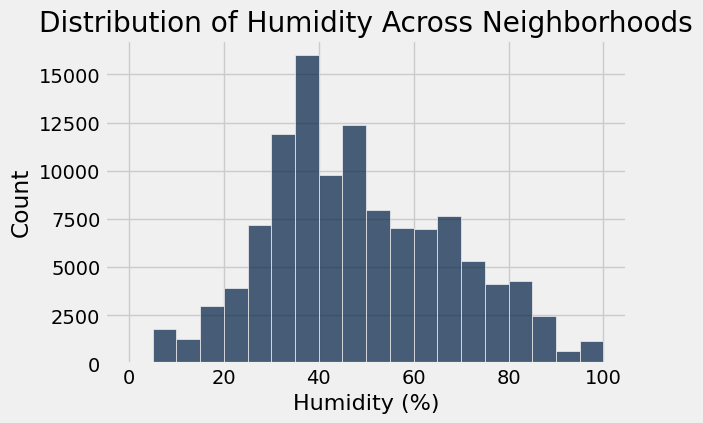

In [25]:
# Humidity across neighborhoods histogram
# By default the hist() function displays percent per unit on the y-axis
# However, it is more intuitive in my opinion to display the raw counts instead
# Hence I used normed=False

merged_table.hist('humidity', bins=np.arange(0,101,5), normed=False)

plt.title("Distribution of Humidity Across Neighborhoods")
plt.xlabel("Humidity (%)")
plt.show()


# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [26]:
# pm25 function definition
def calculate_pm25_category(pm25):
  if pm25 < 12:
    return "Good"
  elif 12 <= pm25 < 35:
    return "Moderate"
  else:
    return "Unhealthy"


In [27]:
# Creating a new column by applying the function to pm25 values then grouping
merged_table2 = merged_table.with_column("PM25_Category", merged_table.apply(calculate_pm25_category, 'pm25'))

merged_table2.group('PM25_Category')

PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [50]:
# Importing random to use random.sample()
import random

num_rows = merged_table.num_rows
sample_size = int(0.1 * num_rows)

# Choosing random sample of 10% of the rows using random.sample() and putting them into an array
random_rows = random.sample(range(0, num_rows+1), sample_size)

# Taking the random rows and storing them into a new table
sampled_table = merged_table.take(random_rows)


In [51]:
# Calculating and printing the mean of sampled data
sampled_mean_pm25 = np.mean(sampled_table.column('pm25'))
print("Mean PM25 for Sampled Data:", sampled_mean_pm25)


Mean PM25 for Sampled Data: 7.15081947844


In [52]:
# Sampling 100 times and storing the results in an array
sample_means = []

for _ in range(100):
    random_indices = random.sample(range(merged_table.num_rows), int(0.1 * num_rows))
    sample = merged_table.take(random_indices)
    sample_means.append(np.mean(sample.column('pm25')))

In [53]:
# Defining own rounding functions for neater binning for the histogram

from math import *

def round_up(n, decimals=0):
        factor = 10 ** decimals
        return ceil(n * factor) / factor

def round_down(n, decimals=0):
    factor = 1 / (10 ** decimals)
    return (n // factor) * factor

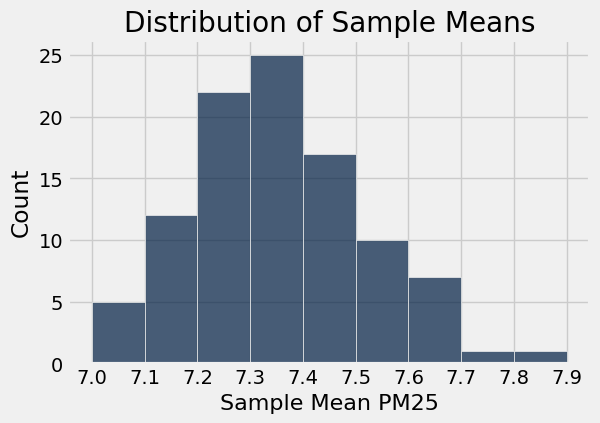

In [67]:
# Drawing the histogram

# Rounding minimum and maximum samples to 1 decimal point be used for binning later
min_sample = round_down(min(sample_means),1)
max_sample = round_up(max(sample_means),1)

# Defining the bins
sample_bins = np.arange(min_sample,max_sample+0.1,0.1)
sample_bins_table = Table().with_column("Sample Mean PM25", sample_means).bin('Sample Mean PM25',bins=sample_bins)
max_bin = max(sample_bins_table.column(1))
sample_count = Table().with_column("Sample Mean PM25", sample_means).group('Sample Mean PM25')


# Plotting the histogram
# xticks() and yticks() are used to improve x axis readability

Table().with_column("Sample Mean PM25", sample_means).hist("Sample Mean PM25", bins = sample_bins, normed=False)
plt.xticks(sample_bins)
#plt.yticks(np.arange(0,max_bin+1,5))
plt.title("Distribution of Sample Means")
plt.show()

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.